1. Linear Regression

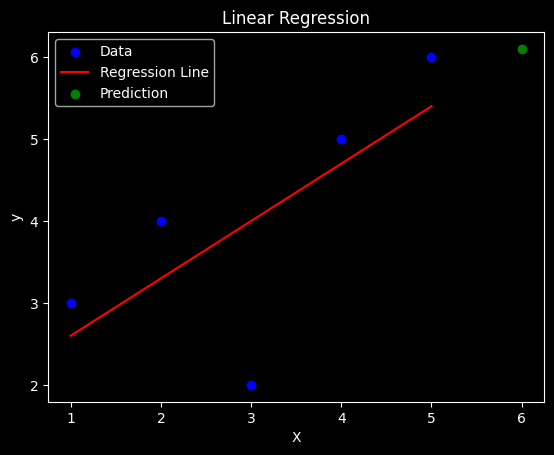

Prediction for x=6: 6.10


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([3, 4, 2, 5, 6])

# Model
model = LinearRegression()
model.fit(X, y)

# Prediction
pred = model.predict([[6]])

# Visualization
plt.style.use('dark_background')
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.scatter(6, pred, color='green', label='Prediction')
plt.legend()
plt.title("Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

print(f"Prediction for x=6: {pred[0]:.2f}")

---

2. Multilinear Regression

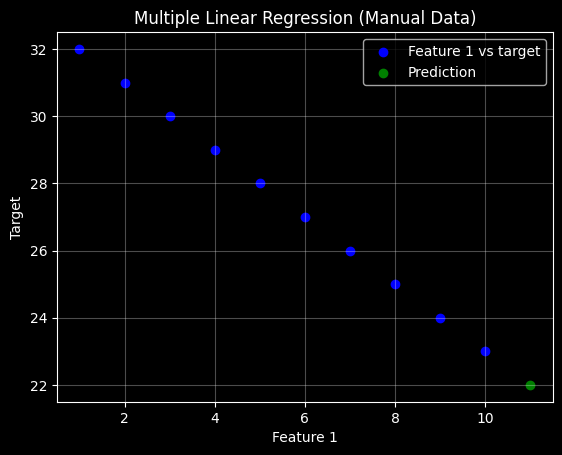

Prediction for sample [11, 0]: 22.00


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Custom data (2 features, 10 samples)
feature1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
feature2 = np.array([10, 9, 8, 7, 6, 5, 4, 3, 2, 1]).reshape(-1, 1)

# Combine the features
X = np.hstack((feature1, feature2))

# Target variable (some custom linear relationship)
# For example: y = 2*feature1 + 3*feature2
y = 2 * feature1.flatten() + 3 * feature2.flatten()

# Train model
model = LinearRegression()
model.fit(X, y)

# Predict for a new sample
sample = np.array([[11, 0]])  # e.g., feature1=11, feature2=0
pred = model.predict(sample)

# Visualization: Just show relation of feature1 vs target
plt.style.use('dark_background')
plt.scatter(X[:, 0], y, color='blue', label='Feature 1 vs target')
plt.scatter(sample[0, 0], pred, color='green', label='Prediction')
plt.title("Multiple Linear Regression (Manual Data)")
plt.xlabel("Feature 1")
plt.ylabel("Target")
plt.legend()
plt.grid(True,alpha=0.3)
plt.show()

print(f"Prediction for sample {sample.tolist()[0]}: {pred[0]:.2f}")

---

3. Polynomial Regression

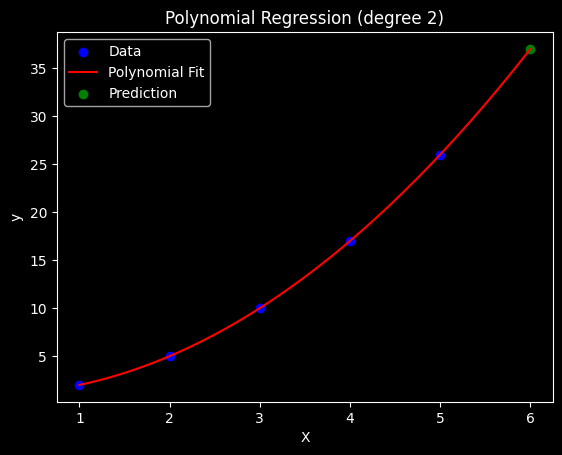

Prediction for x=6: 37.00


In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Quadratic data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 5, 10, 17, 26])  # roughly y = x² + 1

# Model pipeline
model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
model.fit(X, y)

# Prediction
pred = model.predict([[6]])

# Visualization
X_range = np.linspace(1, 6, 100).reshape(-1, 1)
y_range = model.predict(X_range)
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_range, y_range, color='red', label='Polynomial Fit')
plt.scatter(6, pred, color='green', label='Prediction')
plt.title("Polynomial Regression (degree 2)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

print(f"Prediction for x=6: {pred[0]:.2f}")

---

4. Lasso Regression (L1 Regularisation)

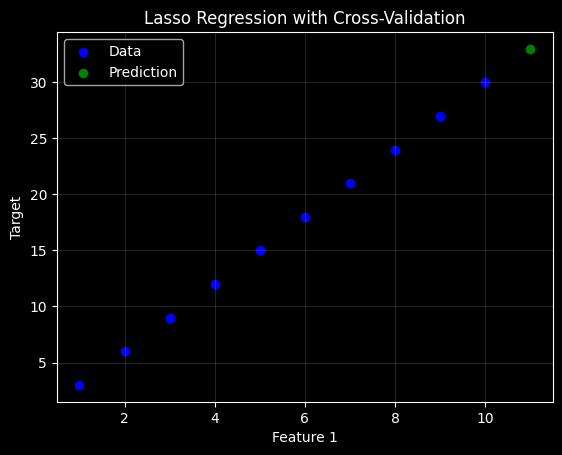

Best alpha selected by LassoCV: 0.0248
Prediction for sample [11, 0]: 32.98
Model coefficients: [ 2.99700000e+00 -2.27427504e-16]


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV

# Create custom features
feature1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
feature2 = np.array([10, 9, 8, 7, 6, 5, 4, 3, 2, 1]).reshape(-1, 1)

# Stack features horizontally
X = np.hstack((feature1, feature2))

# Define target with a sparse linear relationship
# Let's simulate y = 3 * feature1 (feature2 is noise)
y = 3 * feature1.flatten()

# Use LassoCV to automatically choose best alpha
model = LassoCV(cv=5)
model.fit(X, y)

# Prediction for a new data point
sample = np.array([[11, 0]])
pred = model.predict(sample)

# Visualization
plt.style.use('dark_background')
plt.scatter(X[:, 0], y, color='blue', label='Data')
plt.scatter(sample[0, 0], pred, color='green', label='Prediction')
plt.title("Lasso Regression with Cross-Validation")
plt.xlabel("Feature 1")
plt.ylabel("Target")
plt.legend()
plt.grid(True,alpha=0.2,linewidth=0.5)
plt.show() 

print(f"Best alpha selected by LassoCV: {model.alpha_:.4f}")
print(f"Prediction for sample {sample.tolist()[0]}: {pred[0]:.2f}")
print(f"Model coefficients: {model.coef_}")

---

5.Ridge Regression (L2 Regularisation)

C:\Users\haroo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


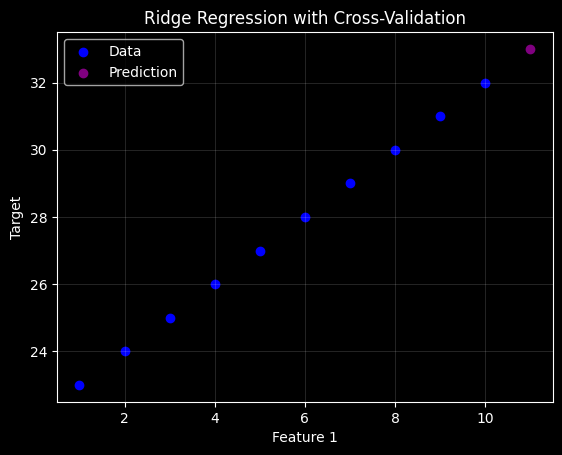

Best alpha selected by RidgeCV: 0.01
Prediction for sample [11, 0]: 33.00
Model coefficients: [ 0.4999697 -0.4999697]


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

# Custom features
feature1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
feature2 = np.array([10, 9, 8, 7, 6, 5, 4, 3, 2, 1]).reshape(-1, 1)

# Combine features horizontally
X = np.hstack((feature1, feature2))

# Define target with both features contributing
# y = 3*feature1 + 2*feature2
y = 3 * feature1.flatten() + 2 * feature2.flatten()

# Ridge regression with built-in CV over alphas
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]
model = RidgeCV(alphas=alphas, store_cv_values=True)
model.fit(X, y)

# Make prediction
sample = np.array([[11, 0]])
pred = model.predict(sample)

# Plotting (only feature1 vs target for visualization)
plt.style.use('dark_background')
plt.scatter(X[:, 0], y, color='blue', label='Data')
plt.scatter(sample[0, 0], pred, color='purple', label='Prediction')
plt.title("Ridge Regression with Cross-Validation")
plt.xlabel("Feature 1")
plt.ylabel("Target")
plt.legend()
plt.grid(True,linewidth=0.5,alpha=0.2)
plt.show()

print(f"Best alpha selected by RidgeCV: {model.alpha_}")
print(f"Prediction for sample {sample.tolist()[0]}: {pred[0]:.2f}")
print(f"Model coefficients: {model.coef_}")

---

6. Elastic-Net Regression (Combination Of L1 & L2 Regularisation)

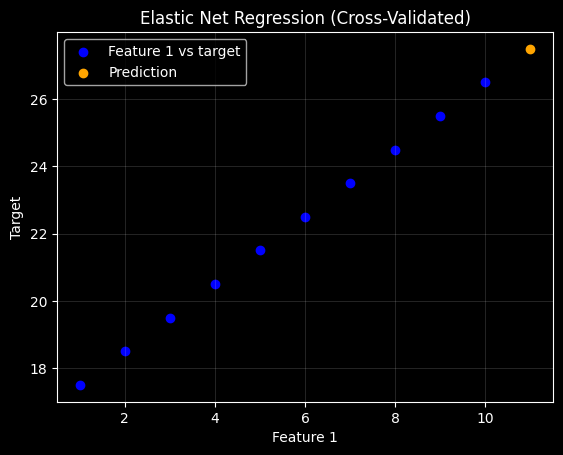

Best alpha selected by ElasticNetCV: 0.0083
Best l1_ratio selected: 1.0
Prediction for sample [11, 0]: 27.49
Model coefficients: [ 9.99000e-01 -6.89684e-18]


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNetCV

# Step 1: Create manual feature data
feature1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
feature2 = np.array([10, 9, 8, 7, 6, 5, 4, 3, 2, 1]).reshape(-1, 1)

# Step 2: Stack features side by side
X = np.hstack((feature1, feature2))

# Step 3: Create target with both features contributing
# For example: y = 2.5 * feature1 + 1.5 * feature2
y = 2.5 * feature1.flatten() + 1.5 * feature2.flatten()

# Step 4: Initialize ElasticNetCV (auto alpha + l1_ratio tuning)
model = ElasticNetCV(cv=5, l1_ratio=[.1, .5, .7, .9, .95, 1.0])
model.fit(X, y)

# Step 5: Prediction for a new sample
sample = np.array([[11, 0]])  # feature1 = 11, feature2 = 0
pred = model.predict(sample)

# Step 6: Visualize only Feature 1 vs Target for clarity
plt.style.use('dark_background')
plt.scatter(X[:, 0], y, color='blue', label='Feature 1 vs target')
plt.scatter(sample[0, 0], pred, color='orange', label='Prediction')
plt.title("Elastic Net Regression (Cross-Validated)")
plt.xlabel("Feature 1")
plt.ylabel("Target")
plt.legend()
plt.grid(True,alpha=0.2,linewidth=0.5)
plt.show()

# Step 7: Print results
print(f"Best alpha selected by ElasticNetCV: {model.alpha_:.4f}")
print(f"Best l1_ratio selected: {model.l1_ratio_}")
print(f"Prediction for sample {sample.tolist()[0]}: {pred[0]:.2f}")
print(f"Model coefficients: {model.coef_}")

---

7. Support Vector Regression

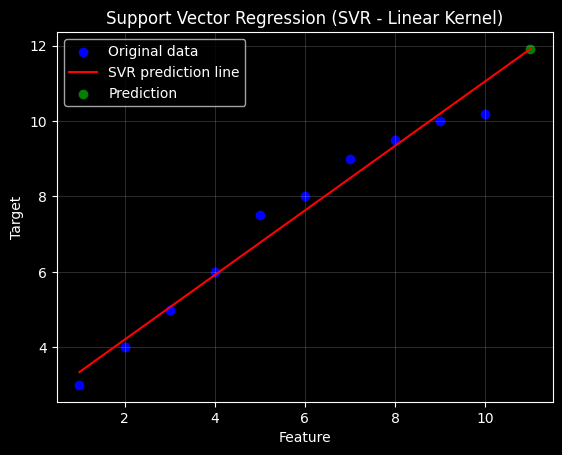

Prediction for x = 11: 11.91
Model coefficients: [[0.85714286]]


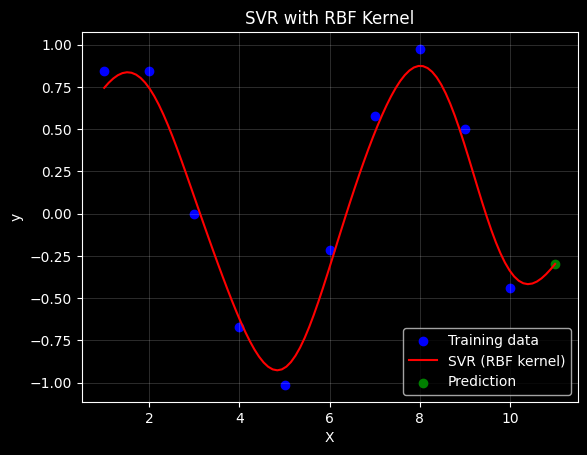

Prediction at x = 11: -0.30


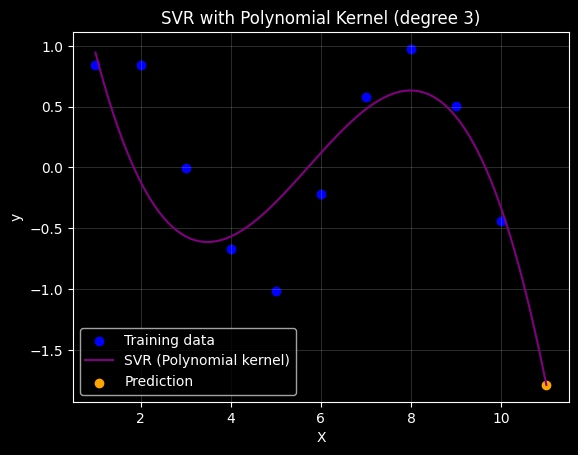

Prediction at x = 11: -1.79


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# 1. Linear Kernal
# Step 1: Create manual feature and target data
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([3, 4, 5, 6, 7.5, 8, 9, 9.5, 10, 10.2])  # Mildly nonlinear

# Step 2: Initialize SVR model with linear kernel
model = SVR(kernel='linear', C=100.0, epsilon=0.2)
model.fit(X, y)

# Step 3: Predict for a new data point
sample = np.array([[11]])
pred = model.predict(sample)

# Step 4: Visualize model prediction
X_range = np.linspace(1, 11, 100).reshape(-1, 1)
y_range = model.predict(X_range)

# Plotting the results
plt.style.use('dark_background')
plt.scatter(X, y, color='blue', label='Original data')
plt.plot(X_range, y_range, color='red', label='SVR prediction line')
plt.scatter(sample[0, 0], pred, color='green', label='Prediction')
plt.title("Support Vector Regression (SVR - Linear Kernel)")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.grid(True,alpha=0.3,linewidth=0.4)
plt.show()

# Step 5: Output results
print(f"Prediction for x = {sample.flatten()[0]}: {pred[0]:.2f}")
print(f"Model coefficients: {model.coef_}")

# 2. RBF kernel SVR
X = np.array([[i] for i in range(1, 11)])
y = np.sin(X).ravel() + 0.1 * np.random.randn(10)  # noisy sine pattern

# Fit SVR with RBF kernel
model = SVR(kernel='rbf', C=100, gamma=0.5, epsilon=0.1)
model.fit(X, y)

# Predict a new value
sample = np.array([[11]])
pred = model.predict(sample)

# Plot the model
X_range = np.linspace(1, 11, 100).reshape(-1, 1)
y_range = model.predict(X_range)

# Plotting the results
plt.style.use('dark_background')
plt.scatter(X, y, color='blue', label='Training data')
plt.plot(X_range, y_range, color='red', label='SVR (RBF kernel)')
plt.scatter(sample, pred, color='green', label='Prediction')
plt.title("SVR with RBF Kernel")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True,alpha=0.3,linewidth=0.4)
plt.show()

print(f"Prediction at x = {sample.flatten()[0]}: {pred[0]:.2f}")


# 3. Polynomial kernel SVR
# Fit SVR with Polynomial kernel
model = SVR(kernel='poly', degree=3, C=100, epsilon=0.1, coef0=1)
model.fit(X, y)

# Predict a new value
pred_poly = model.predict(sample)

# Plot the model
y_range_poly = model.predict(X_range)

plt.scatter(X, y, color='blue', label='Training data')
plt.plot(X_range, y_range_poly, color='purple', label='SVR (Polynomial kernel)')
plt.scatter(sample, pred_poly, color='orange', label='Prediction')
plt.title("SVR with Polynomial Kernel (degree 3)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True,alpha=0.3,linewidth=0.4)
plt.show()

print(f"Prediction at x = {sample.flatten()[0]}: {pred_poly[0]:.2f}")

---

8. Decision Tree Regression

In [20]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# Sample data
X = np.array([[i] for i in range(1, 11)])
y = np.array([3, 4, 5, 6, 6.5, 7, 7.5, 7.5, 8, 8])

# Initialize model with controlled depth and leaf size
model = DecisionTreeRegressor(max_depth=3, min_samples_leaf=2)
model.fit(X, y)

# Predict for a new value
sample = np.array([[11]])
pred = model.predict(sample)

print(f"Prediction for x = {sample[0][0]}: {pred[0]:.2f}")
print(f"Model depth: {model.get_depth()}, Number of leaves: {model.get_n_leaves()}")

Prediction for x = 11: 8.00
Model depth: 3, Number of leaves: 4


---

9. KNN Regression

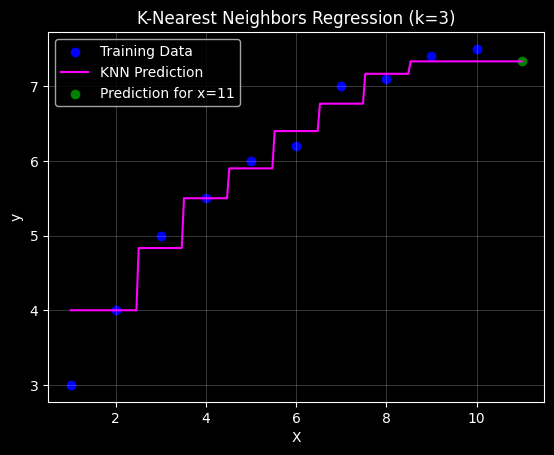

Prediction for x = 11: 7.33


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

# Step 1: Create the dataset
X = np.array([[i] for i in range(1, 11)])  # Features from 1 to 10
y = np.array([3, 4, 5, 5.5, 6, 6.2, 7, 7.1, 7.4, 7.5])  # Target with gentle curve

# Step 2: Initialize and train the KNN model
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X, y)

# Step 3: Predict for a new input
sample = np.array([[11]])
pred = model.predict(sample)

# Step 4: Predict across a smooth range for plotting
X_range = np.linspace(1, 11, 200).reshape(-1, 1)
y_range = model.predict(X_range)

plt.style.use('dark_background')
plt.scatter(X, y, color='blue', label='Training Data')
plt.plot(X_range, y_range, color='magenta', label='KNN Prediction')
plt.scatter(sample, pred, color='green', label='Prediction for x=11')
plt.title("K-Nearest Neighbors Regression (k=3)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True,alpha=0.3, linewidth=0.5)
plt.show()

# Step 5: Output prediction
print(f"Prediction for x = {sample[0][0]}: {pred[0]:.2f}")

---

10. Gradient Boosting (XG boost, CatBoost, LightGBM, Random Forest Regressor, HGBR)

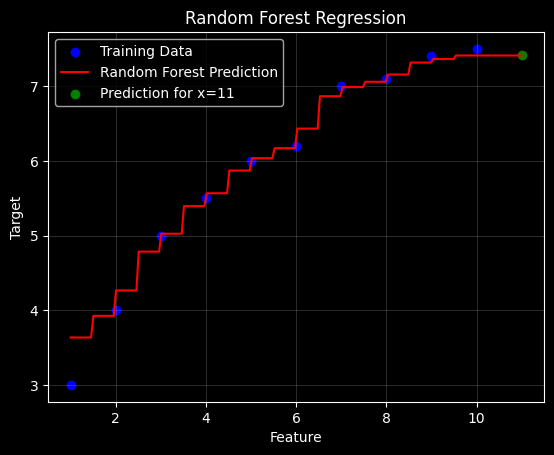

Prediction for x = 11: 7.41


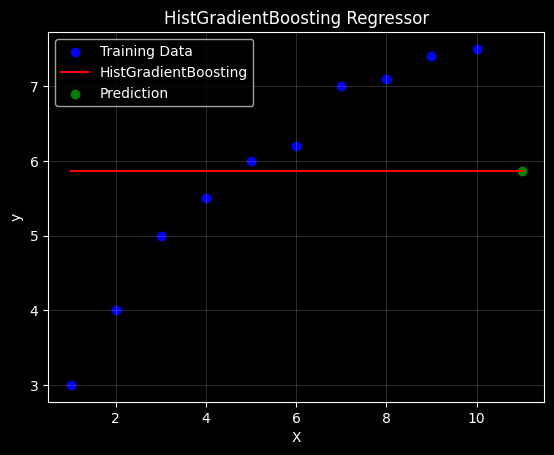

Prediction for x = 11: 5.87


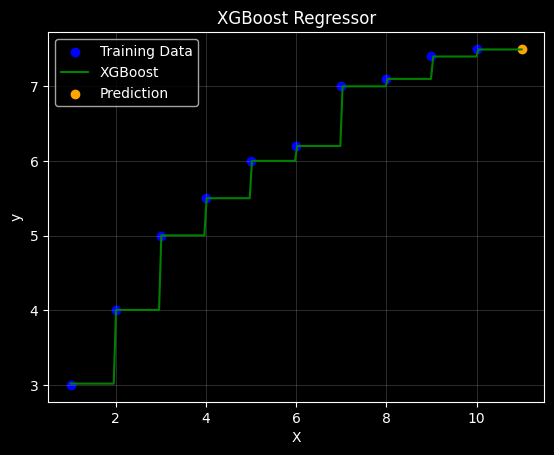

Prediction for x = 11: 7.49


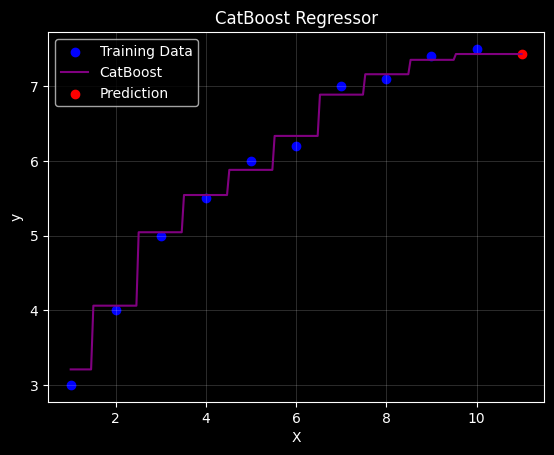

Prediction for x = 11: 7.43
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 10, number of used features: 0
[LightGBM] [Info] Start training from score 5.870000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no mo

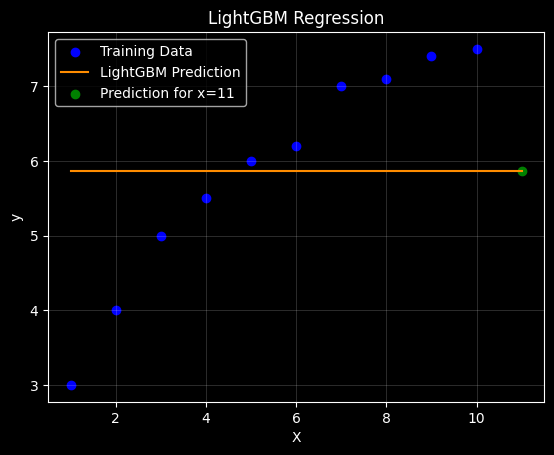

Prediction for x = 11: 5.87


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor


# Random Forest Regressor Example
# Step 1: Define input feature and target manually
X = np.array([[i] for i in range(1, 11)])  # Feature values 1 to 10
y = np.array([3, 4, 5, 5.5, 6, 6.2, 7, 7.1, 7.4, 7.5])  # Target values

# Step 2: Initialize and train the model
model = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=42)
model.fit(X, y)

# Step 3: Predict for a new value
sample = np.array([[11]])
pred = model.predict(sample)

# Step 4: Plot predictions across a smooth input range
X_range = np.linspace(1, 11, 200).reshape(-1, 1)
y_range = model.predict(X_range)

# Plotting the results
plt.style.use('dark_background')
plt.scatter(X, y, color='blue', label='Training Data')
plt.plot(X_range, y_range, color='red', label='Random Forest Prediction')
plt.scatter(sample, pred, color='green', label='Prediction for x=11')
plt.title("Random Forest Regression")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.grid(True,alpha=0.3,linewidth=0.4)
plt.show()

# Step 5: Output prediction
print(f"Prediction for x = {sample[0][0]}: {pred[0]:.2f}")



# histGradiantBoostingRegressor Example
from sklearn.ensemble import HistGradientBoostingRegressor

# Training data
X = np.array([[i] for i in range(1, 11)])
y = np.array([3, 4, 5, 5.5, 6, 6.2, 7, 7.1, 7.4, 7.5])

# Model
model = HistGradientBoostingRegressor(max_iter=100, learning_rate=0.1)
model.fit(X, y)

# Predict for a new sample
sample = np.array([[11]])
pred = model.predict(sample)

# Plot
X_range = np.linspace(1, 11, 200).reshape(-1, 1)
y_range = model.predict(X_range)

plt.style.use('dark_background')
plt.scatter(X, y, color='blue', label='Training Data')
plt.plot(X_range, y_range, color='red', label='HistGradientBoosting')
plt.scatter(sample, pred, color='green', label='Prediction')
plt.title("HistGradientBoosting Regressor")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True,alpha=0.3,linewidth=0.4)
plt.show()

print(f"Prediction for x = 11: {pred[0]:.2f}")


# Xg boost Regressor Example
from xgboost import XGBRegressor

# Training data
X = np.array([[i] for i in range(1, 11)])
y = np.array([3, 4, 5, 5.5, 6, 6.2, 7, 7.1, 7.4, 7.5])

# Model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X, y)

# Predict for a new sample
sample = np.array([[11]])
pred = model.predict(sample)

# Plot
X_range = np.linspace(1, 11, 200).reshape(-1, 1)
y_range = model.predict(X_range)

plt.style.use('dark_background')
plt.scatter(X, y, color='blue', label='Training Data')
plt.plot(X_range, y_range, color='green', label='XGBoost')
plt.scatter(sample, pred, color='orange', label='Prediction')
plt.title("XGBoost Regressor")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True,alpha=0.3,linewidth=0.4)
plt.show()

print(f"Prediction for x = 11: {pred[0]:.2f}")


# CatBoost Regressor Example
from catboost import CatBoostRegressor

# Training data
X = np.array([[i] for i in range(1, 11)])
y = np.array([3, 4, 5, 5.5, 6, 6.2, 7, 7.1, 7.4, 7.5])

# Model
model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=3, verbose=0)
model.fit(X, y)

# Predict for a new sample
sample = np.array([[11]])
pred = model.predict(sample)

# Plot
X_range = np.linspace(1, 11, 200).reshape(-1, 1)
y_range = model.predict(X_range)

plt.style.use('dark_background')
plt.scatter(X, y, color='blue', label='Training Data')
plt.plot(X_range, y_range, color='purple', label='CatBoost')
plt.scatter(sample, pred, color='red', label='Prediction')
plt.title("CatBoost Regressor")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True,alpha=0.3,linewidth=0.4)
plt.show()

print(f"Prediction for x = 11: {pred[0]:.2f}")


# LightGBM Regressor Example
import lightgbm as lgb

# Step 1: Create sample data
X = np.array([[i] for i in range(1, 11)])  # Features from 1 to 10
y = np.array([3, 4, 5, 5.5, 6, 6.2, 7, 7.1, 7.4, 7.5])  # Slightly nonlinear target

# Step 2: Initialize and train the LightGBM model
model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X, y)

# Step 3: Predict for a new sample
sample = np.array([[11]])
pred = model.predict(sample)

# Step 4: Plot predictions across a smooth input range
X_range = np.linspace(1, 11, 200).reshape(-1, 1)
y_range = model.predict(X_range)

plt.style.use('dark_background')
plt.scatter(X, y, color='blue', label='Training Data')
plt.plot(X_range, y_range, color='darkorange', label='LightGBM Prediction')
plt.scatter(sample, pred, color='green', label='Prediction for x=11')
plt.title("LightGBM Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True,alpha=0.3,linewidth=0.4)
plt.show()

# Step 5: Output prediction
print(f"Prediction for x = {sample[0][0]}: {pred[0]:.2f}")

---

11. Bayesian Regression

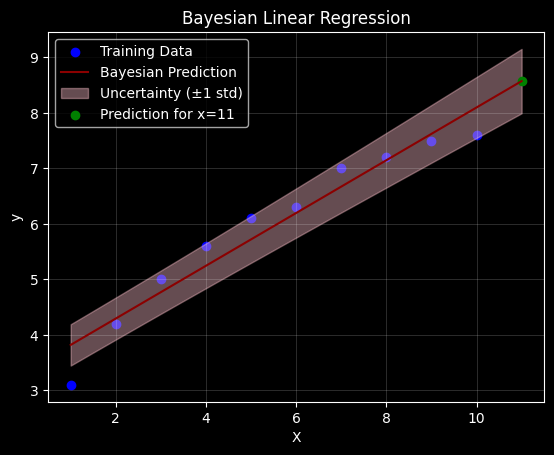

Prediction for x = 11: 8.57


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge

# Step 1: Create sample data
X = np.array([[i] for i in range(1, 11)])
y = np.array([3.1, 4.2, 5.0, 5.6, 6.1, 6.3, 7.0, 7.2, 7.5, 7.6])  # Slightly noisy

# Step 2: Initialize and train Bayesian Ridge model
model = BayesianRidge()
model.fit(X, y)

# Step 3: Predict for a new sample
sample = np.array([[11]])
pred = model.predict(sample)

# Step 4: Predict across a smooth range for plotting
X_range = np.linspace(1, 11, 200).reshape(-1, 1)
y_range, std_range = model.predict(X_range, return_std=True)

# Step 5: Plot
plt.style.use('dark_background')
plt.scatter(X, y, color='blue', label='Training Data')
plt.plot(X_range, y_range, color='darkred', label='Bayesian Prediction')
plt.fill_between(X_range.flatten(), y_range - std_range, y_range + std_range,
                 color='pink', alpha=0.4, label='Uncertainty (±1 std)')
plt.scatter(sample, pred, color='green', label='Prediction for x=11')
plt.title("Bayesian Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True,alpha=0.3,linewidth=0.4)
plt.show()

# Step 6: Output prediction
print(f"Prediction for x = {sample[0][0]}: {pred[0]:.2f}")

---------